# Plots
Some intuitive plots about adaptive modeling.

In [157]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pymc3 as pm
import pandas as pd
import seaborn as sns
SEED = 383561
# from random.org, for reproducibility
np.random.seed(SEED)

sns.set(style='ticks')
#sns.despine(left=True)

N_INIT = 10**5
N_SAMPLE = 10**5

In [158]:
# Bimodal Beta
with pm.Model() as prior_model:
    a = pm.Beta('Accept MT', 0.5, 0.5)
    obs = pm.Binomial('obs', n=1, p=a, observed=np.array([]))
    prior = pm.sample(N_SAMPLE, n_init=N_INIT,
                      tune=100,
                      random_seed=SEED)[100:]

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -0.025668: 100%|██████████| 100000/100000 [00:15<00:00, 6591.61it/s]
Finished [100%]: Average ELBO = -0.022554
Evidence of divergence detected, inspect ELBO.
INFO (theano.gof.compilelock): Refreshing lock /home/lee/.theano/compiledir_Linux-4.4--generic-x86_64-with-LinuxMint-18.1-serena-x86_64-3.5.2-64/lock_dir/lock
100%|██████████| 100000/100000 [01:36<00:00, 1034.89it/s]


In [159]:
# Include Participant Data 
with pm.Model() as obs_model:
    a = pm.Beta('Accept MT', 0.5, 0.5)
    obs = pm.Binomial('obs', n=1, p=a, observed=np.array([1, 1]))
    posterior = pm.sample(N_SAMPLE, n_init=N_INIT,
                      tune=100,
                      random_seed=SEED)[100:]

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -1.0726: 100%|██████████| 100000/100000 [00:14<00:00, 7081.43it/s]
Finished [100%]: Average ELBO = -1.063
Evidence of divergence detected, inspect ELBO.
INFO (theano.gof.compilelock): Refreshing lock /home/lee/.theano/compiledir_Linux-4.4--generic-x86_64-with-LinuxMint-18.1-serena-x86_64-3.5.2-64/lock_dir/lock
100%|██████████| 100000/100000 [01:46<00:00, 941.76it/s]


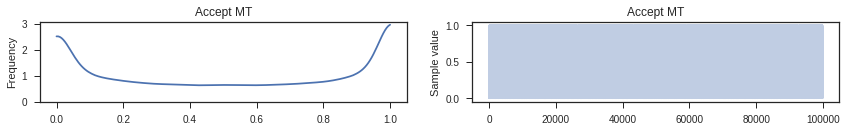

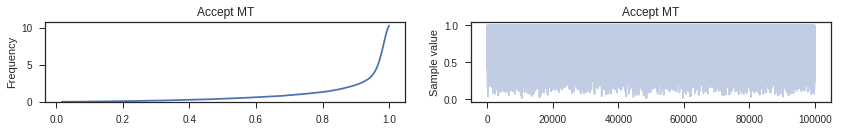

In [160]:
pm.plots.traceplot(prior, ['Accept MT'])
pm.plots.traceplot(posterior, ['Accept MT'])
plt.show()

Text(0,0.5,'Likelihood P($\\theta$)')

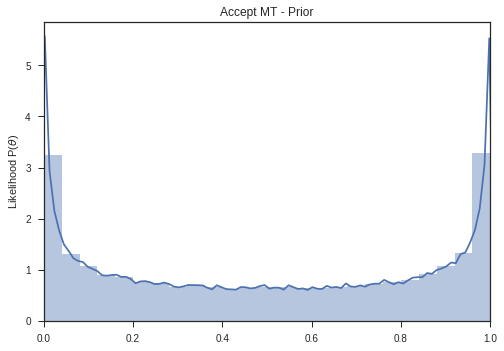

In [161]:
fig, ax = plt.subplots(1, 1)
sns.distplot(prior['Accept MT'], ax=ax, bins=25, kde_kws={'bw': 0.01}, norm_hist=True)
ax.set_xlim([0, 1])
ax.set_title('Accept MT - Prior')
ax.set_ylabel(r'Likelihood P($\theta$)')

Text(0.5,1,'Accept MT - Posterior')

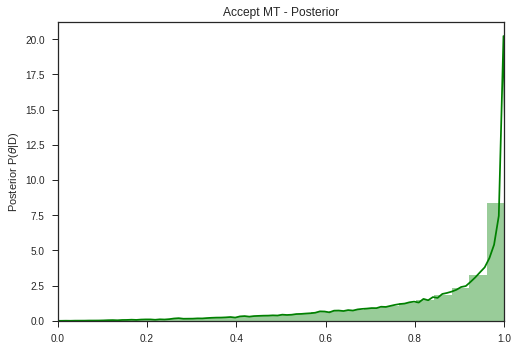

In [188]:
fig, ax = plt.subplots(1, 1)
sns.distplot(posterior['Accept MT'], ax=ax, bins=25, kde_kws={'bw': 0.01}, norm_hist=True, color='g')
ax.set_xlim([0, 1])
ax.set_ylabel(r'Posterior P($\theta$|D)')
ax.set_title('Accept MT - Posterior')

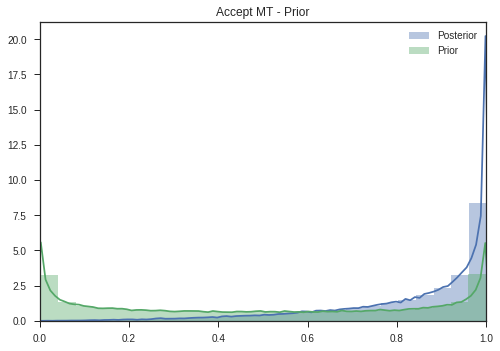

In [163]:
fig, ax = plt.subplots(1, 1)
sns.distplot(posterior['Accept MT'], ax=ax, bins=25, kde_kws={'bw': 0.01}, 
             norm_hist=True, label='Posterior')
sns.distplot(prior['Accept MT'], ax=ax, bins=25, kde_kws={'bw': 0.01}, 
             norm_hist=True, label='Prior')
ax.set_xlim([0, 1])
ax.set_title('Accept MT - Prior')
ax.legend()

In [172]:
obs_ppc  = pm.sample_ppc(posterior, model=obs_model,
                            samples=1, size=20000000, random_seed=SEED)
prior_ppc  = pm.sample_ppc(prior, model=prior_model,
                            samples=1, size=20000000, random_seed=SEED)

100%|██████████| 1/1 [00:00<00:00,  1.02it/s]


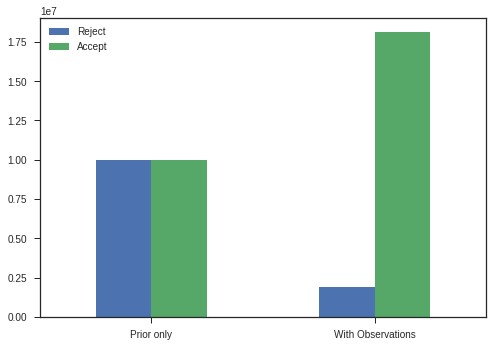

In [178]:
x = ['Reject', 'Accept']
y = np.array([[obs_ppc['obs'].shape[1]/2, obs_ppc['obs'].shape[1]/2],
              [obs_ppc['obs'].shape[1] - obs_ppc['obs'].sum(), obs_ppc['obs'].sum()]
              ])
df = pd.DataFrame(y, columns=x, index=['Prior only', 'With Observations'])
df.plot.bar(rot=0)
plt.show()

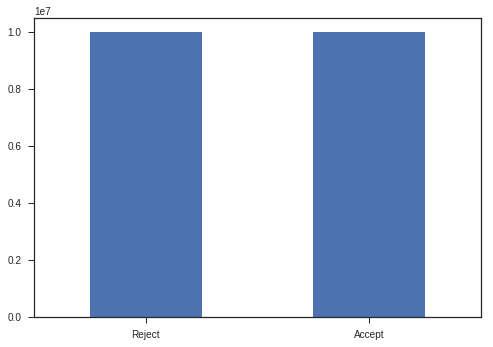

In [179]:
df.loc['Prior only'].plot.bar(rot=0)

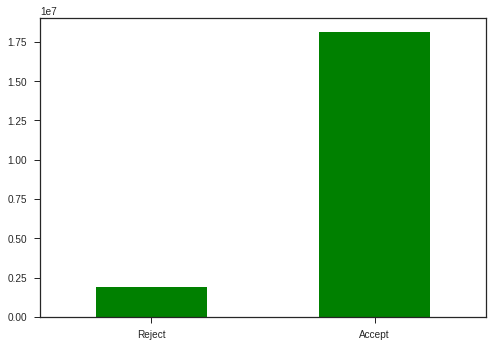

In [186]:
df.loc['With Observations'].plot.bar(rot=0, color='g')